In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [49]:
df = pd.read_csv('./cirrhosis.csv')


In [50]:
df['Age'] = np.round(df['Age'] / 365)


In [51]:
df['Drug'].value_counts(dropna=False)


Drug
D-penicillamine    158
Placebo            154
NaN                106
Name: count, dtype: int64

In [52]:
df = df.dropna()
df = df.drop(columns= ['Status', 'N_Days', 'ID'])

In [53]:
df['Sex'] = df['Sex'].replace({'F': 0, 'M': 1})
df['Ascites'] = df['Ascites'].replace({'Y': 1, 'N': 0})
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'Y': 1, 'N': 0})
df['Spiders'] = df['Spiders'].replace({'Y': 1, 'N': 0})
df['Edema'] = df['Edema'].replace({'Y': 1, 'N': 0, 'S': 0})
df['Drug'] = df['Drug'].replace({'D-penicillamine': 1, 'Placebo': 0})
df

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,59.0,0,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,1,56.0,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1,70.0,1,0,0,0,0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1,55.0,0,0,1,1,0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,0,38.0,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1,61.0,0,0,1,0,0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,0,58.0,0,0,0,0,0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,1,62.0,0,0,0,0,0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,1,38.0,0,0,0,0,0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [54]:
df['Stage'] = df['Stage'].replace({4.0: 1, 3.0: 1, 2.0: 0, 1.0:0})
df

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,59.0,0,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,1.0
1,1,56.0,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,1.0
2,1,70.0,1,0,0,0,0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,1.0
3,1,55.0,0,0,1,1,0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,1.0
4,0,38.0,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1,61.0,0,0,1,0,0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,0.0
308,0,58.0,0,0,0,0,0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,0.0
309,1,62.0,0,0,0,0,0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,0.0
310,1,38.0,0,0,0,0,0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,0.0


In [55]:
x = df.drop(columns= 'Stage')
num_cols = x.columns[x.nunique()>7]
cat_cols = x.columns[x.nunique()<=7]
y = df['Stage']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

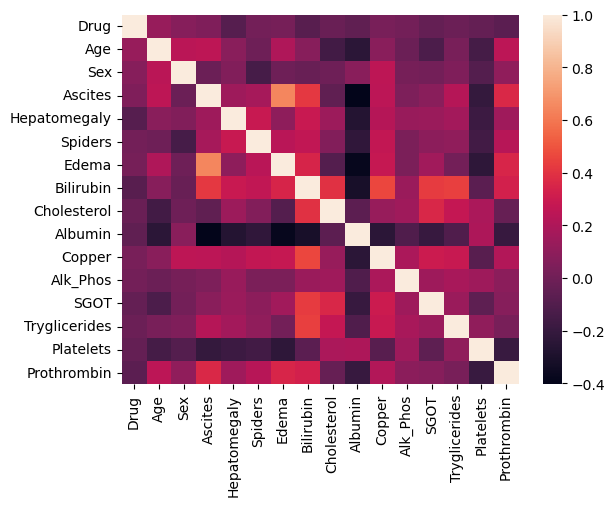

In [56]:
sns.heatmap(x.corr());


In [57]:
df = df.drop(columns= ['Edema'])

In [58]:
cat_vals = Pipeline([('ohe', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'))])
num_vals = Pipeline([("scale",StandardScaler())])


In [59]:
preprocess = ColumnTransformer(
    transformers=[
        ("cat_process", cat_vals, cat_cols),
        ("num_process", num_vals, num_cols)
    ]
)

In [60]:
search_space = [{
                'pca__n_components':np.linspace(1,16,5).astype(int),
                'clf__max_depth': range(1,30),
                'clf__min_samples_split': [30, 40,50,60]}
                   ]


In [61]:
pipeline = Pipeline([("preprocess",preprocess), 
                     ("pca", PCA()),
                     ("clf", DecisionTreeClassifier())])


In [62]:
gs = GridSearchCV(pipeline, search_space, cv=5)
gs.fit(x_train, y_train)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_process',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')),
                                                                        ('num_process',
                                                                         Pipeline(steps=[('scale',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object'))])),
                                       ('pca', PCA()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid=[{'clf__max_depth': range(1, 30),
                          'clf__min_samples_split': [30, 40, 50, 60],
                          'pca__n_components': array([ 1,  4,  8, 12, 16])}])

In [63]:
best_model = gs.best_estimator_
print(best_model.score(x_test,y_test))

0.7857142857142857
